In [1]:
import pandas as pd
import numpy as np

In [2]:
# Read the CSV file
df = pd.read_csv('GTbank ABSA output.csv')

In [3]:
# Convert the 'Aspects' column to lowercase
df['Aspect'] = df['Aspect'].str.lower()


In [19]:
# Define the mapping for renaming the aspects
aspect_mapping = {
    'customer service': ['customer service', 'customer support'],
    'online banking': ['online banking', 'internet banking'],
    'internet network': ['internet connectivity', 'internet network'],
    'personal loan': ['personal loan', 'loan'],
    'mortgage service': ['mortgage'],
    'atm services': ['atm'],
    'security': ['security'],
    'deposits': ['deposit'],
    'interest rate': ['interest rate'],
    'security': ['security'],
    'exchange rate': ['exchange rate'],
    'mobile banking': ['mobile banking', 'mobile app'],
    'staff': ['staff'],
    'accounts': ['account'],
    'transfer': ['transfer'],
    'transaction': ['transaction'],
    'reward': ['reward'],
    'requirement': ['requirement'],
    'retail banking': ['retail banking'],
    'response time': ['response time'],
    'MoneyGram': ['moneygram'],
    'Western Union service': ['western union'],
    'GT Sweep': ['gt sweep'],
    'GTRescue': ['gtrescue'],
    'i Refer program': ['i refer'],
    'GeNS': ['gens'],
    'spend 2 save': ['spend 2'],
    'WorldRemit': ['worldremit'],
    'us visa fees payment service': ['us visa'],
    'bank website': ['website'],
    'GT connect app': ['gtconnect'],
    'interest rate': ['interest rate'],
    'CASHPOT': ['cashpot']
}

In [20]:
# Define the specific aspects to filter for
aspects_to_filter = [
    'customer service',
    'online banking',
    'internet network',
    'accounts',
    'mobile banking',
    'atm',
    'withdraw',
    'requirement',
    'interest rate',
    'deposit',
    'personal loan',
    'transfer',
    'transaction',
    'reward',
    'retail banking',
    'response time',
    'MoneyGram',
    'exchange rate',
    'Western Union',
    'security',
    'GT Sweep',
    'GTRescue',
    'staff',
    'mortgage service',
    'i Refer',
    'GeNS',
    'website',
    'spend 2 save',
    'WorldRemit',
    'us visa fees payment service',
    'GT connect app',
    'CASHPOT'
    ]

In [21]:
# Filter and rename the aspects
filtered_df = df.copy()
for aspect, replacements in aspect_mapping.items():
    aspect_matches = filtered_df['Aspect'].str.contains('|'.join(replacements))
    filtered_df.loc[aspect_matches, 'Aspect'] = aspect

In [22]:
# Filter the dataframe to include only the aspects that contain any value from aspects_to_filter
filtered_df = filtered_df[filtered_df['Aspect'].str.contains('|'.join(aspects_to_filter))]

In [23]:
# Print the filtered dataframe
filtered_df

,Review_ID,Aspect,Opinion,Polarity
0,0,customer service,top,Positive
1,0,staff,friendly,Positive
2,0,accounts,never had any issues,Positive
5,1,staff,professionalism,Positive
6,1,accounts,guided,Positive
...,...,...,...,...
860,503,GT connect app,terrible,Negative
861,503,customer service,wouldn't let,Negative
863,505,GT connect app,disaster,Negative
865,506,GT connect app,joke,Negative


In [24]:
# Count the occurrences of each aspect
aspect_counts = filtered_df['Aspect'].value_counts().reset_index()
aspect_counts.columns = ['Aspect', 'Total']


In [25]:
# Count the occurrences of positive, negative, and neutral sentiments for each aspect
sentiment_counts = filtered_df.groupby('Aspect')['Polarity'].value_counts().unstack(fill_value=0).reset_index()
sentiment_counts.columns = ['Aspect', 'Negative', 'Neutral','Positive'  ]


In [26]:
# Merge the counts into a new dataframe
summary_df = pd.merge(aspect_counts, sentiment_counts, on='Aspect')


In [27]:
# Print the new dataframe
summary_df

,Aspect,Total,Negative,Neutral,Positive
0,staff,50,5,0,45
1,customer service,45,9,1,35
2,accounts,43,13,3,27
3,transfer,40,7,0,33
4,interest rate,28,13,0,15
5,personal loan,18,1,0,17
6,transaction,17,6,2,9
7,GT Sweep,15,2,1,12
8,atm services,14,1,0,13
9,GTRescue,14,1,0,13


#Finalize

In [28]:
# Create a new dataframe to store the Aspect and Polarity with the highest value
max_polarity_df = pd.DataFrame(columns=['Aspect', 'Polarity'])

# Iterate over each row in the filtered dataframe
for index, row in summary_df.iterrows():
    aspect = row['Aspect']
    polarity_columns = ['Negative', 'Neutral', 'Positive']
    polarity_values = [row[col] for col in polarity_columns]
    max_polarity = max(polarity_values)
    max_polarity_label = polarity_columns[polarity_values.index(max_polarity)]

    # Append the Aspect and Polarity with the highest value to a temporary dataframe
    temp_df = pd.DataFrame({'Aspect': [aspect], 'Polarity': [max_polarity_label]})

    # Concatenate the temporary dataframe with the max_polarity_df
    max_polarity_df = pd.concat([max_polarity_df, temp_df], ignore_index=True)


In [29]:
# Print the new dataframe
max_polarity_df

,Aspect,Polarity
0,staff,Positive
1,customer service,Positive
2,accounts,Positive
3,transfer,Positive
4,interest rate,Positive
5,personal loan,Positive
6,transaction,Positive
7,GT Sweep,Positive
8,atm services,Positive
9,GTRescue,Positive


##**VISUALIZATIONS**

#Wordcloud for each aspect

In [30]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [31]:
# Group the filtered dataframe by Aspect
grouped_df = filtered_df.groupby('Aspect')


In [32]:

# Iterate over each unique aspect
for aspect, group in grouped_df:
    # Get the opinions for the current aspect
    opinions = group['Opinion'].tolist()

    # Combine the opinions into a single string
    combined_opinions = ' '.join(opinions)

    # Generate the word cloud
    wordcloud = WordCloud().generate(combined_opinions)

    # Plot the word cloud
    plt.figure(figsize=(8, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Word Cloud for Aspect: {aspect}")
    plt.axis('off')
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

A bar chart to visualize the count of each aspect in the filtered dataset

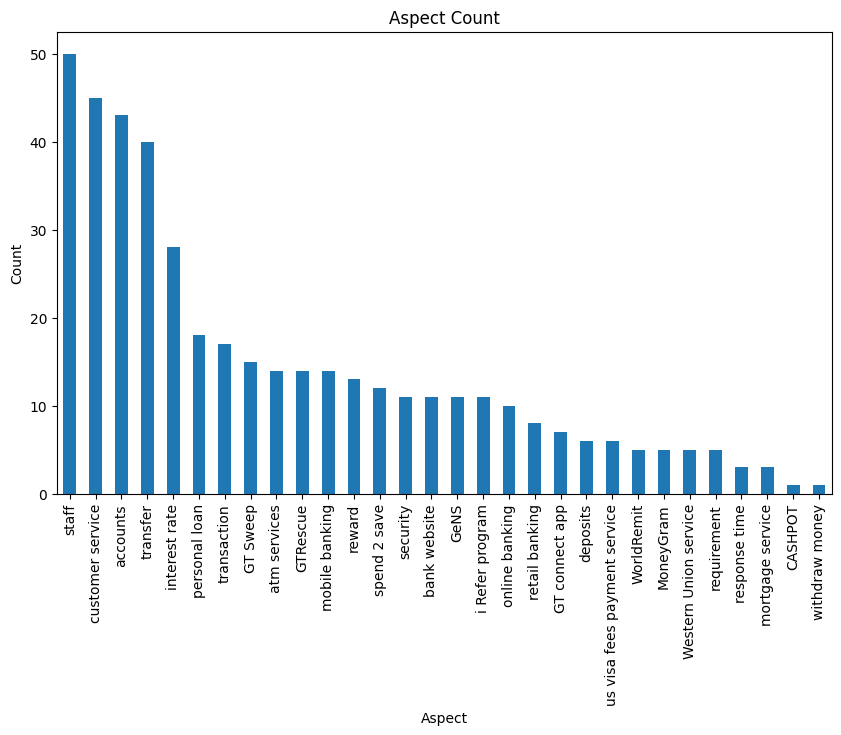

In [33]:
import matplotlib.pyplot as plt

# Calculate the count of each aspect
aspect_counts = filtered_df['Aspect'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 6))
aspect_counts.plot(kind='bar')
plt.title('Aspect Count')
plt.xlabel('Aspect')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


A stacked bar chart to show the distribution of sentiment categories (negative, neutral, positive) within each aspect.

<ipython-input-34-dad52c1904e6>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sentiment_counts = summary_df.groupby('Aspect')['Negative', 'Neutral', 'Positive'].sum()


<Figure size 1000x600 with 0 Axes>

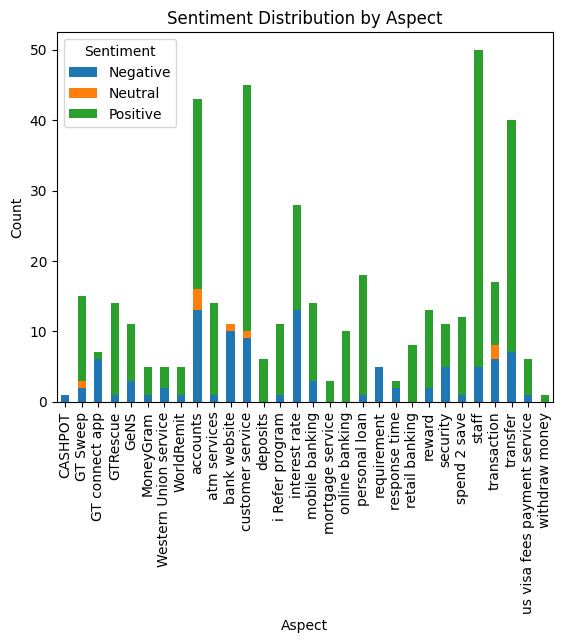

In [34]:
# Calculate the count of each sentiment category for each aspect
sentiment_counts = summary_df.groupby('Aspect')['Negative', 'Neutral', 'Positive'].sum()

# Plot the stacked bar chart
plt.figure(figsize=(10, 6))
sentiment_counts.plot(kind='bar', stacked=True)
plt.title('Sentiment Distribution by Aspect')
plt.xlabel('Aspect')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Sentiment')
plt.show()
